In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [6]:
df = pd.read_csv("datafiles/drawndata1.csv")
df.head()

,x1,x2,y
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [7]:
X = df[['x1', 'x2']].values
y = df['y'] == "a"

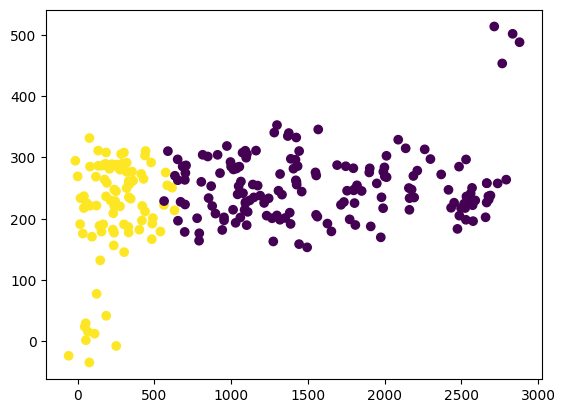

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)

The scaling in x and y axis are very different. and also possible outliers in the corners

So lets try standard scaler () (z-score scaling)

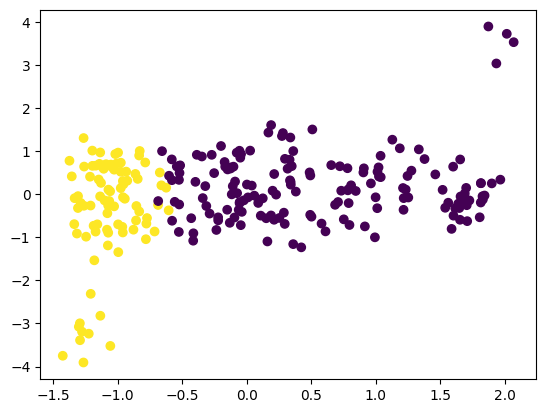

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(X)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

Now we can observe that the scaling is okay but outlier problem is not sloved  
we may try quantile transformer (adjusting the percentile scale  
![Alt Text](datafiles/image.png))

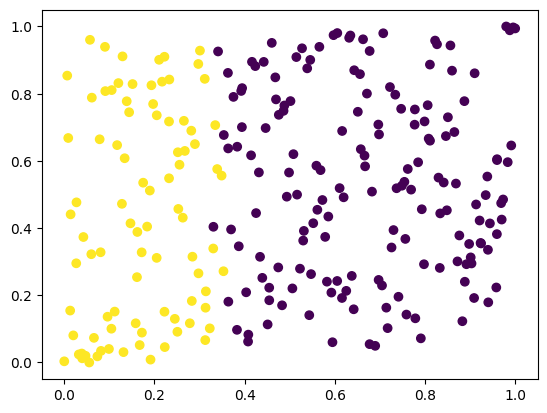

In [12]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

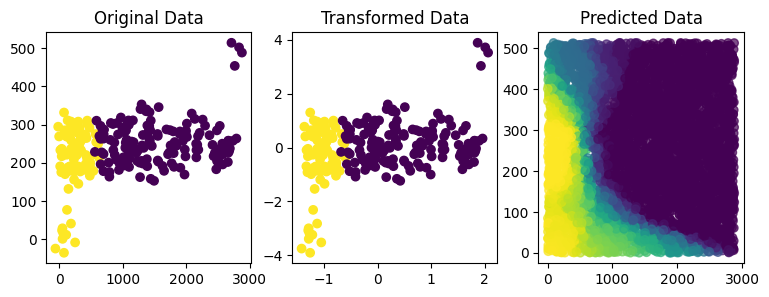

In [14]:
plot_output(scaler=StandardScaler())

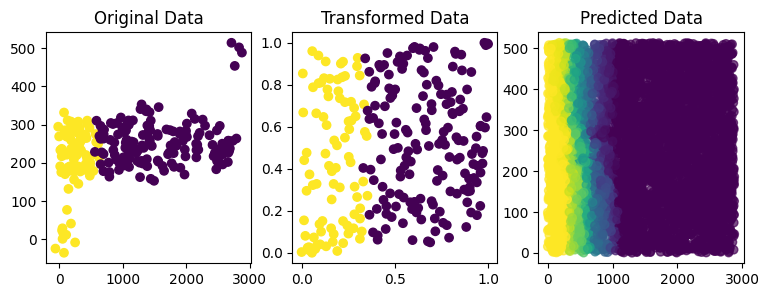

In [15]:

plot_output(scaler=QuantileTransformer(n_quantiles=100))

______________________

## New Dataset

In [18]:
df = pd.read_csv("datafiles/drawndata2.csv")
df.head()

,x1,x2,y
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


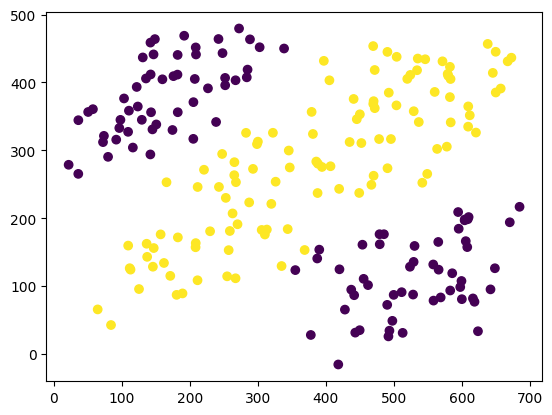

In [19]:
X = df[['x1','x2']].values
y = df['y'] == 'a'

plt.scatter(X[:,0], X[:,1], c=y)

______________

A simple logistic regressor cannot predict this (non linear) lets try

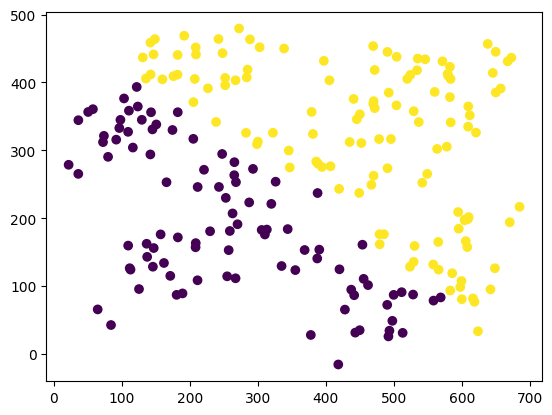

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

Very bad Prediction

______

bad if we add polunomial features?

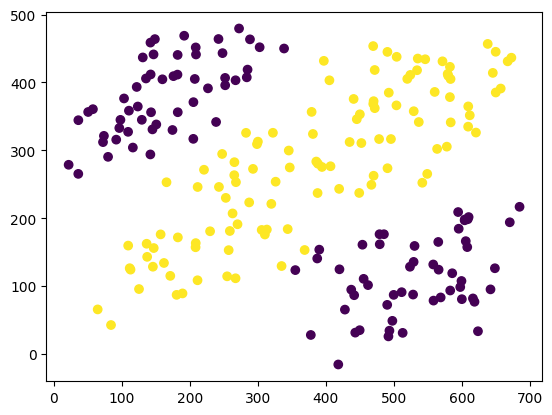

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

Close to perfect prediction

_______________________

In [24]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [34]:
# enc.transform([["zero"]]) # this will give error

In [ ]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # prevents errors if you try to transform a category not seen during fit()
enc.fit_transform(arr)

enc.transform([["zero"]])

array([[0., 0., 0.]])

## Checkout drawdata.xyz to draw scatter plot and create your own data points